# 哈希表

<u>哈希表（hash table）</u>，又称<u>散列表</u>，它通过建立键 `key` 与值 `value` 之间的映射，实现高效的元素查询。具体而言，我们向哈希表中输入一个键 `key` ，则可以在 $O(1)$ 时间内获取对应的值 `value` 。

如下图所示，给定 $n$ 个学生，每个学生都有“姓名”和“学号”两项数据。假如我们希望实现“输入一个学号，返回对应的姓名”的查询功能，则可以采用下图所示的哈希表来实现。

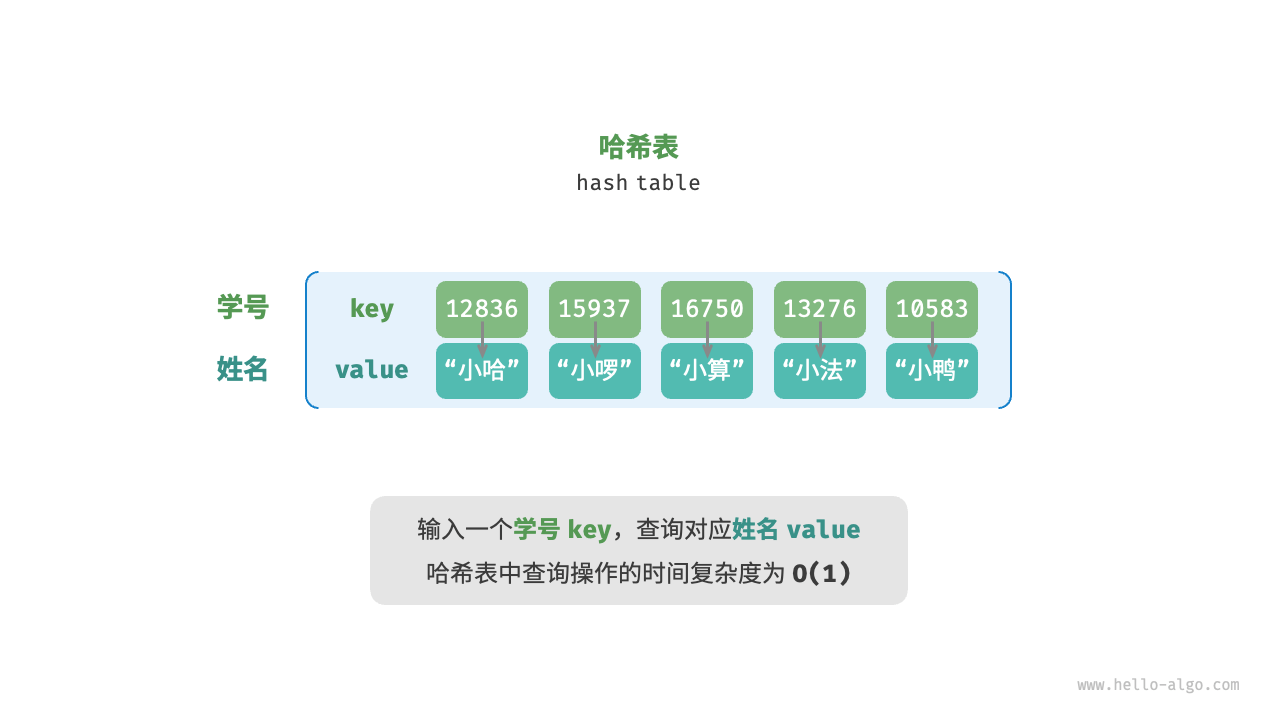

除哈希表外，数组和链表也可以实现查询功能，它们的效率对比如下表所示。

- **添加元素**：仅需将元素添加至数组（链表）的尾部即可，使用 $O(1)$ 时间。
- **查询元素**：由于数组（链表）是乱序的，因此需要遍历其中的所有元素，使用 $O(n)$ 时间。
- **删除元素**：需要先查询到元素，再从数组（链表）中删除，使用 $O(n)$ 时间。

<p align="center"> 表 <id> &nbsp; 元素查询效率对比 </p>

|          | 数组   | 链表   | 哈希表 |
| -------- | ------ | ------ | ------ |
| 查找元素 | $O(n)$ | $O(n)$ | $O(1)$ |
| 添加元素 | $O(1)$ | $O(1)$ | $O(1)$ |
| 删除元素 | $O(n)$ | $O(n)$ | $O(1)$ |

观察发现，**在哈希表中进行增删查改的时间复杂度都是 $O(1)$** ，非常高效。

## 哈希表常用操作

哈希表的常见操作包括：初始化、查询操作、添加键值对和删除键值对等，示例代码如下：


In [1]:
package main

import (
	"fmt"
)

func main() {
// 初始化哈希表
hmap := make(map[int]string)

// 添加操作
// 在哈希表中添加键值对
hmap[12836] = "小哈"
hmap[15937] = "小啰"
hmap[16750] = "小算"
hmap[13276] = "小法"
hmap[10583] = "小鸭"

// 查询操作
// 向哈希表中输入键key，得到对应的值value
name := hmap[13276]
fmt.Println("学号为13276的同学姓名是：", name)

// 删除操作
// 从哈希表中删除键key对应的键值对
delete(hmap, 10583)

// 遍历操作
// 遍历键值对
for id, name := range hmap {
	fmt.Println("学号：", id, "，姓名：", name)
}

// 单独遍历键 key
for id := range hmap {
	fmt.Println("学号：", id)
}

// 单独遍历值 value
for _, name := range hmap {
	fmt.Println("姓名：", name)
}

}

学号为13276的同学姓名是： 小法
学号： 12836 ，姓名： 小哈
学号： 15937 ，姓名： 小啰
学号： 16750 ，姓名： 小算
学号： 13276 ，姓名： 小法
学号： 15937
学号： 16750
学号： 13276
学号： 12836
姓名： 小哈
姓名： 小啰
姓名： 小算
姓名： 小法


## 哈希表简单实现

我们先考虑最简单的情况，**仅用一个数组来实现哈希表**。在哈希表中，我们将数组中的每个空位称为<u>桶（bucket）</u>，每个桶可存储一个键值对。因此，查询操作就是找到 `key` 对应的桶，并在桶中获取 `value` 。

那么，如何基于 `key` 定位对应的桶呢？这是通过<u>哈希函数（hash function）</u>实现的。哈希函数的作用是将一个较大的输入空间映射到一个较小的输出空间。在哈希表中，输入空间是所有 `key` ，输出空间是所有桶（数组索引）。换句话说，输入一个 `key` ，**我们可以通过哈希函数得到该 `key` 对应的键值对在数组中的存储位置**。

输入一个 `key` ，哈希函数的计算过程分为以下两步。

1. 通过某种哈希算法 `hash()` 计算得到哈希值。
2. 将哈希值对桶数量（数组长度）`capacity` 取模，从而获取该 `key` 对应的桶（数组索引）`index` 。

```shell
index = hash(key) % capacity
```

随后，我们就可以利用 `index` 在哈希表中访问对应的桶，从而获取 `value` 。

设数组长度 `capacity = 100`、哈希算法 `hash(key) = key` ，易得哈希函数为 `key % 100` 。下图以 `key` 学号和 `value` 姓名为例，展示了哈希函数的工作原理。

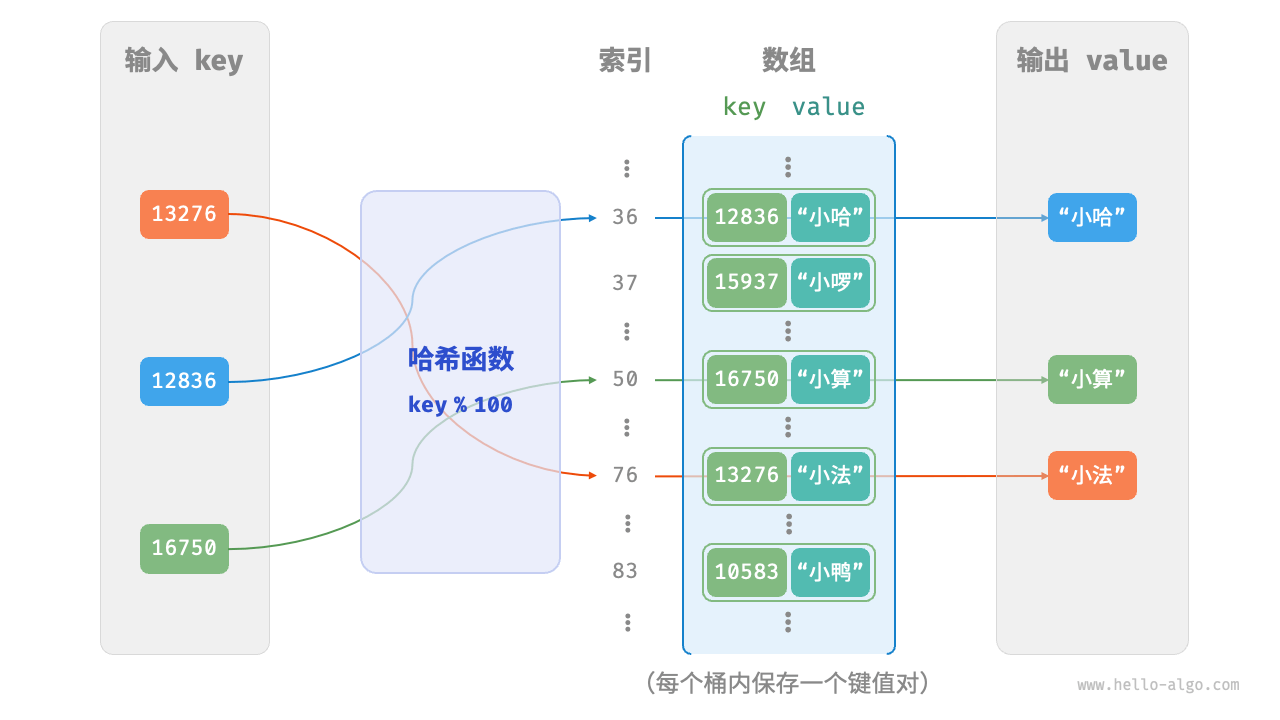

以下代码实现了一个简单哈希表。其中，我们将 `key` 和 `value` 封装成一个类 `Pair` ，以表示键值对。


In [3]:
// 键值对
type Pair struct {
	key   int
	value string
}

// 基于数组实现的哈希表
type arrayHashMap struct {
	buckets []*Pair
}

// 初始化哈希表
func newArrayHashMap(capacity int) *arrayHashMap {
	// 初始化数组 包含一百个桶
	buckets := make([]*Pair, 100)
	return &arrayHashMap{buckets: buckets}
}

// 哈希函数
func (a *arrayHashMap) hashfunc(key int) int {
	index := key % 100
	return index
}

// 查询操作
func (a *arrayHashMap) get(key int) string {
	index := a.hashfunc(key)
	pair := a.buckets[index]
	if pair != nil && pair.key == key {
		return pair.value
	}
	return ""
}

// 添加操作
func (a *arrayHashMap) put(key int, value string) {
	index := a.hashfunc(key)
	a.buckets[index] = &Pair{key: key, value: value}
}

// 删除操作
func (a *arrayHashMap) delete(key int) {
	index := a.hashfunc(key)
	pair := a.buckets[index]
	if pair != nil && pair.key == key {
		a.buckets[index] = nil
	}
}

// 获取所有键对
func (a *arrayHashMap) pairset() []*pair{
	var pairs []*Pair
	for _, pair := range a.buckets {
		if pair != nil {
			pairs = append(pairs, pair)
		}
	}
	return pairs
}

// 获取所有键
func (a *arrayHashMap) keyset() []int {
	var keys []int
	for _,pair := range a.buckets{
		if pair != nil {
			keys = append(keys, pair.key)
		}
	}
	return keys
}

// 获取所有值
func (a *arrayHashMap) valueset() []string{
	var values []string
	for _,pair := range a.buckets{
		if pair != nil {
			values = append(values, pair.value)
		}
	}
	return values
}

// 打印哈希表
func (a *arrayHashMap) printHashMap() {
	for _, pair := range a.buckets {
		if pair != nil {
			fmt.Println("学号：", pair.key, "，姓名：", pair.value)
		}
	}
}



# gonb_0871c996 

 

 ./main.go:53:37: undefined: pair
 
}

// 获取所有键对
 func (a *arrayHashMap) pairset() []*pair{
 var pairs []*Pair
	for _, pair := range a.buckets {

ERROR: failed to run "/usr/bin/go build -o /tmp/gonb_0871c996/gonb_0871c996": exit status 1

## 6.1.3 哈希冲突与扩容
从本质上看，哈希函数的作用是将所有 `key` 构成的输入空间映射到数组所有索引构成的输出空间，而输入空间往往远大于输出空间。因此，理论上一定存在“多个输入对应相同输出”的情况。

对于上述示例中的哈希函数，当输入的 `key` 后两位相同时，哈希函数的输出结果也相同。例如，查询学号为 12836 和 20336 的两个学生时，我们得到：
```shell
12836 % 100 = 36
20336 % 100 = 36
```
如图 6-3 所示，两个学号指向了同一个姓名，这显然是不对的。我们将这种多个输入对应同一输出的情况称为哈希冲突（hash collision）。
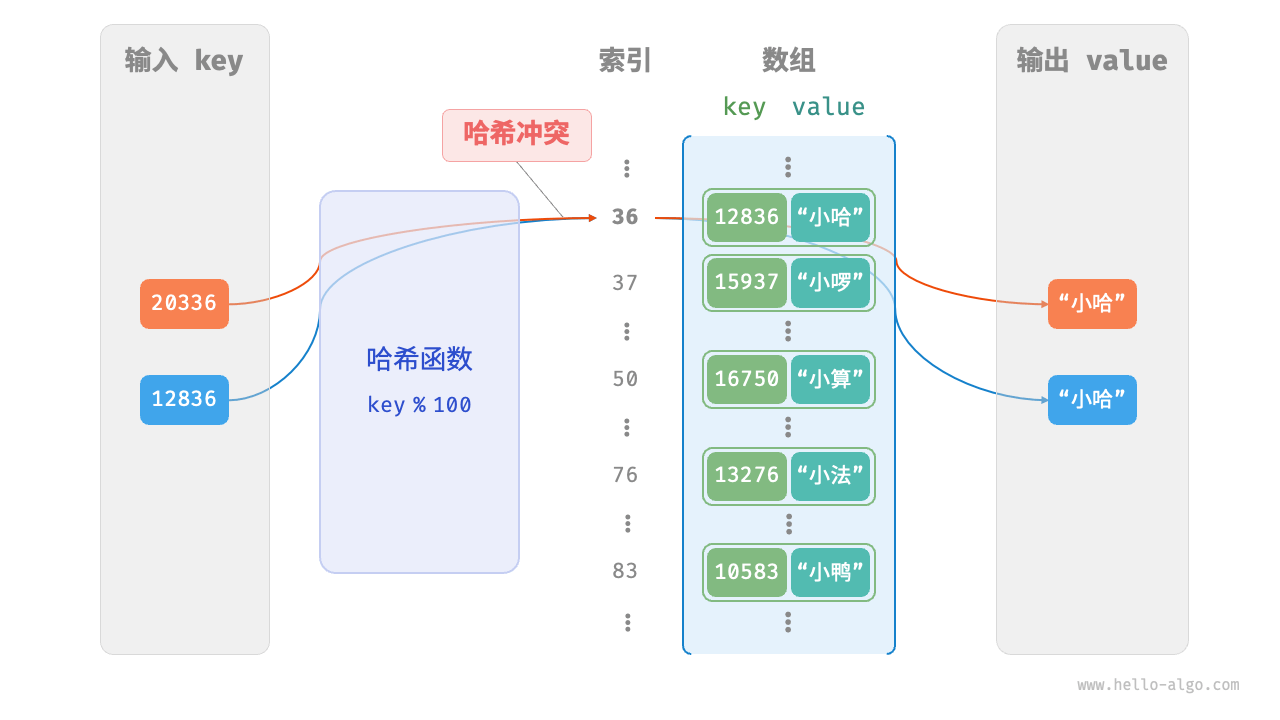
容易想到，哈希表容量 $n$ 越大，多个 `key` 被分配到同一个桶中的概率就越低，冲突就越少。因此，**我们可以通过扩容哈希表来减少哈希冲突**。

如下图所示，扩容前键值对 `(136, A)` 和 `(236, D)` 发生冲突，扩容后冲突消失。
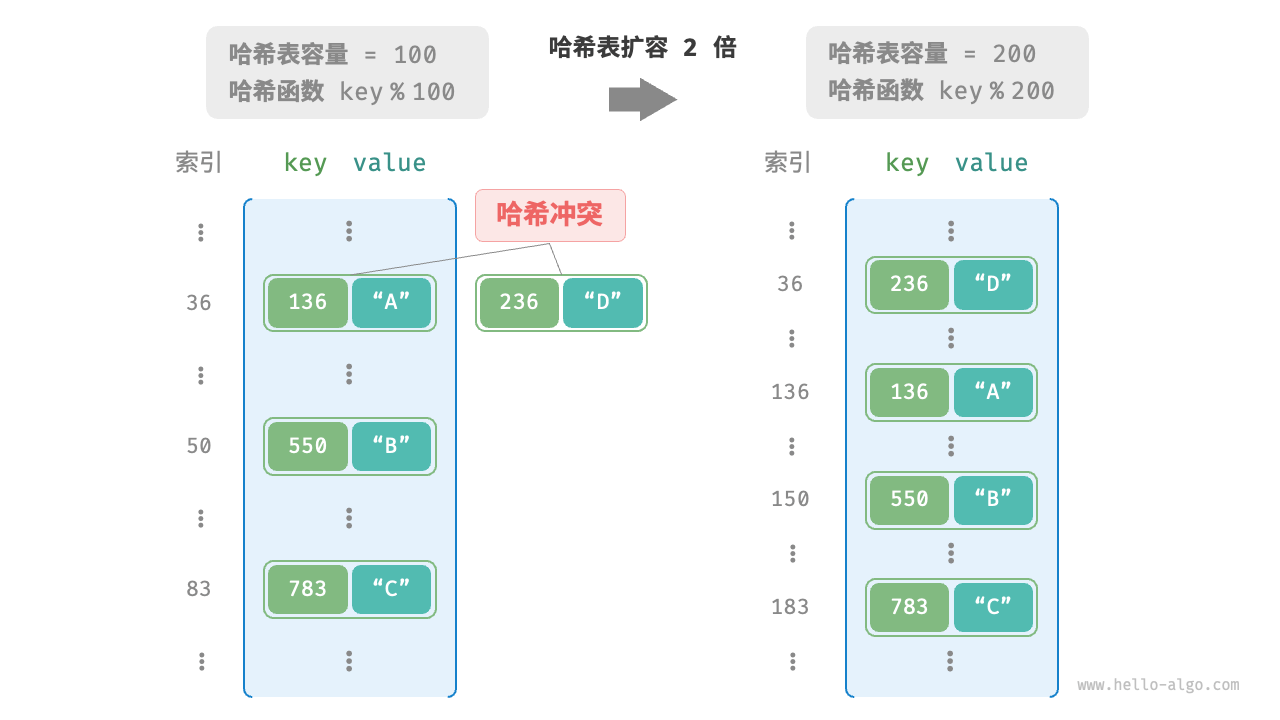
类似于数组扩容，哈希表扩容需将所有键值对从原哈希表迁移至新哈希表，非常耗时；并且由于哈希表容量 `capacity` 改变，我们需要通过哈希函数来重新计算所有键值对的存储位置，这进一步增加了扩容过程的计算开销。为此，编程语言通常会预留足够大的哈希表容量，防止频繁扩容。

<u>负载因子（load factor）</u>是哈希表的一个重要概念，其定义为哈希表的元素数量除以桶数量，用于衡量哈希冲突的严重程度，**也常作为哈希表扩容的触发条件**。例如在 Java 中，当负载因子超过 $0.75$ 时，系统会将哈希表扩容至原先的 $2$ 倍。

# 6.2哈希冲突
上一节提到，**通常情况下哈希函数的输入空间远大于输出空间**，因此理论上哈希冲突是不可避免的。比如，输入空间为全体整数，输出空间为数组容量大小，则必然有多个整数映射至同一桶索引。

哈希冲突会导致查询结果错误，严重影响哈希表的可用性。为了解决该问题，每当遇到哈希冲突时，我们就进行哈希表扩容，直至冲突消失为止。此方法简单粗暴且有效，但效率太低，因为哈希表扩容需要进行大量的数据搬运与哈希值计算。为了提升效率，我们可以采用以下策略。

1. 改良哈希表数据结构，**使得哈希表可以在出现哈希冲突时正常工作**。
2. 仅在必要时，即当哈希冲突比较严重时，才执行扩容操作。

哈希表的结构改良方法主要包括“**链式地址**”和“**开放寻址**”。

## 链式地址

在原始哈希表中，每个桶仅能存储一个键值对。<u>链式地址（separate chaining）</u>将单个元素转换为链表，将键值对作为链表节点，将所有发生冲突的键值对都存储在同一链表中。下图展示了一个链式地址哈希表的例子。

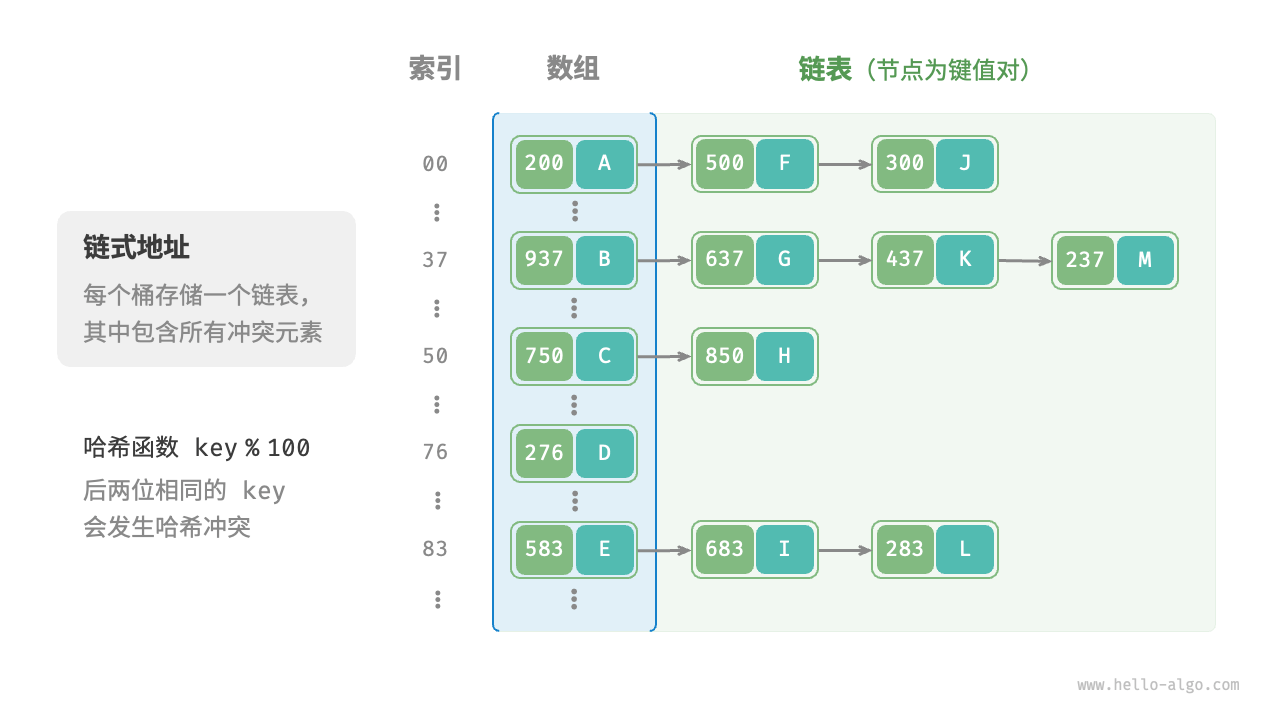

基于链式地址实现的哈希表的操作方法发生了以下变化。

- **查询元素**：输入 `key` ，经过哈希函数得到桶索引，即可访问链表头节点，然后遍历链表并对比 `key` 以查找目标键值对。
- **添加元素**：首先通过哈希函数访问链表头节点，然后将节点（键值对）添加到链表中。
- **删除元素**：根据哈希函数的结果访问链表头部，接着遍历链表以查找目标节点并将其删除。

链式地址存在以下局限性。

- **占用空间增大**：链表包含节点指针，它相比数组更加耗费内存空间。
- **查询效率降低**：因为需要线性遍历链表来查找对应元素。

以下代码给出了链式地址哈希表的简单实现，需要注意两点。

- 使用列表（动态数组）代替链表，从而简化代码。在这种设定下，哈希表（数组）包含多个桶，每个桶都是一个列表。
- 以下实现包含哈希表扩容方法。当负载因子超过 $\frac{2}{3}$ 时，我们将哈希表扩容至原先的 $2$ 倍。


In [ ]:
/* 链式地址哈希表 */
type hashMapChaining struct {
    size        int      // 键值对数量
    capacity    int      // 哈希表容量
    loadThres   float64  // 触发扩容的负载因子阈值
    extendRatio int      // 扩容倍数
    buckets     [][]pair // 桶数组
}

/* 构造方法 */
func newHashMapChaining() *hashMapChaining {
    buckets := make([][]pair, 4)
    for i := 0; i < 4; i++ {
        buckets[i] = make([]pair, 0)
    }
    return &hashMapChaining{
        size:        0,
        capacity:    4,
        loadThres:   2.0 / 3.0,
        extendRatio: 2,
        buckets:     buckets,
    }
}

/* 哈希函数 */
func (m *hashMapChaining) hashFunc(key int) int {
    return key % m.capacity
}

/* 负载因子 */
func (m *hashMapChaining) loadFactor() float64 {
    return float64(m.size) / float64(m.capacity)
}

/* 查询操作 */
func (m *hashMapChaining) get(key int) string {
    idx := m.hashFunc(key)
    bucket := m.buckets[idx]
    // 遍历桶，若找到 key ，则返回对应 val
    for _, p := range bucket {
        if p.key == key {
            return p.val
        }
    }
    // 若未找到 key ，则返回空字符串
    return ""
}

/* 添加操作 */
func (m *hashMapChaining) put(key int, val string) {
    // 当负载因子超过阈值时，执行扩容
    if m.loadFactor() > m.loadThres {
        m.extend()
    }
    idx := m.hashFunc(key)
    // 遍历桶，若遇到指定 key ，则更新对应 val 并返回
    for i := range m.buckets[idx] {
        if m.buckets[idx][i].key == key {
            m.buckets[idx][i].val = val
            return
        }
    }
    // 若无该 key ，则将键值对添加至尾部
    p := pair{
        key: key,
        val: val,
    }
    m.buckets[idx] = append(m.buckets[idx], p)
    m.size += 1
}

/* 删除操作 */
func (m *hashMapChaining) remove(key int) {
    idx := m.hashFunc(key)
    // 遍历桶，从中删除键值对
    for i, p := range m.buckets[idx] {
        if p.key == key {
            // 切片删除
            m.buckets[idx] = append(m.buckets[idx][:i], m.buckets[idx][i+1:]...)
            m.size -= 1
            break
        }
    }
}

/* 扩容哈希表 */
func (m *hashMapChaining) extend() {
    // 暂存原哈希表
    tmpBuckets := make([][]pair, len(m.buckets))
    for i := 0; i < len(m.buckets); i++ {
        tmpBuckets[i] = make([]pair, len(m.buckets[i]))
        copy(tmpBuckets[i], m.buckets[i])
    }
    // 初始化扩容后的新哈希表
    m.capacity *= m.extendRatio
    m.buckets = make([][]pair, m.capacity)
    for i := 0; i < m.capacity; i++ {
        m.buckets[i] = make([]pair, 0)
    }
    m.size = 0
    // 将键值对从原哈希表搬运至新哈希表
    for _, bucket := range tmpBuckets {
        for _, p := range bucket {
            m.put(p.key, p.val)
        }
    }
}

/* 打印哈希表 */
func (m *hashMapChaining) print() {
    var builder strings.Builder

    for _, bucket := range m.buckets {
        builder.WriteString("[")
        for _, p := range bucket {
            builder.WriteString(strconv.Itoa(p.key) + " -> " + p.val + " ")
        }
        builder.WriteString("]")
        fmt.Println(builder.String())
        builder.Reset()
    }
}

值得注意的是，当链表很长时，查询效率 $O(n)$ 很差。**此时可以将链表转换为“AVL 树”或“红黑树”**，从而将查询操作的时间复杂度优化至 $O(\log n)$ 。

## 开放寻址

<u>开放寻址（open addressing）</u>不引入额外的数据结构，而是通过“多次探测”来处理哈希冲突，探测方式主要包括线性探测、平方探测和多次哈希等。

下面以线性探测为例，介绍开放寻址哈希表的工作机制。

### 线性探测

线性探测采用固定步长的线性搜索来进行探测，其操作方法与普通哈希表有所不同。

- **插入元素**：通过哈希函数计算桶索引，若发现桶内已有元素，则从冲突位置向后线性遍历（步长通常为 $1$ ），直至找到空桶，将元素插入其中。
- **查找元素**：若发现哈希冲突，则使用相同步长向后进行线性遍历，直到找到对应元素，返回 `value` 即可；如果遇到空桶，说明目标元素不在哈希表中，返回 `None` 。

下图展示了开放寻址（线性探测）哈希表的键值对分布。根据此哈希函数，最后两位相同的 `key` 都会被映射到相同的桶。而通过线性探测，它们被依次存储在该桶以及之下的桶中。

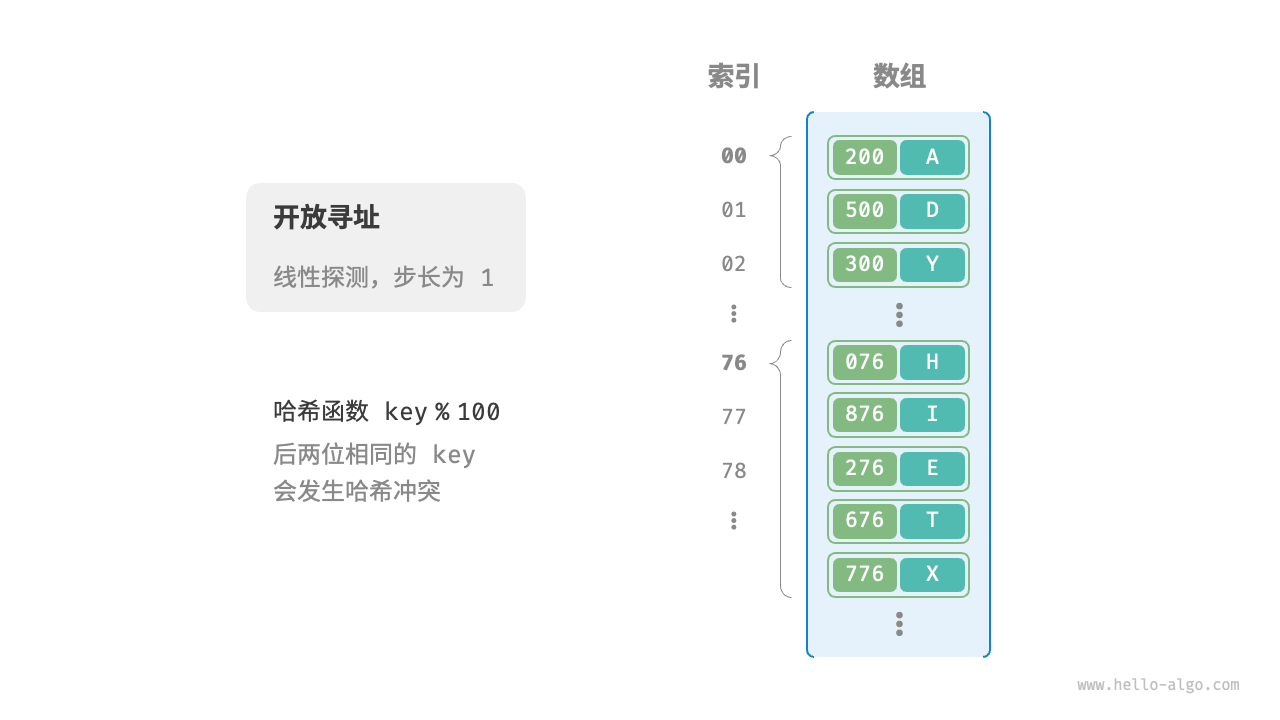

然而，**线性探测容易产生“聚集现象”**。具体来说，数组中连续被占用的位置越长，这些连续位置发生哈希冲突的可能性越大，从而进一步促使该位置的聚堆生长，形成恶性循环，最终导致增删查改操作效率劣化。

值得注意的是，**我们不能在开放寻址哈希表中直接删除元素**。这是因为删除元素会在数组内产生一个空桶 `None` ，而当查询元素时，线性探测到该空桶就会返回，因此在该空桶之下的元素都无法再被访问到，程序可能误判这些元素不存在，如下图所示。

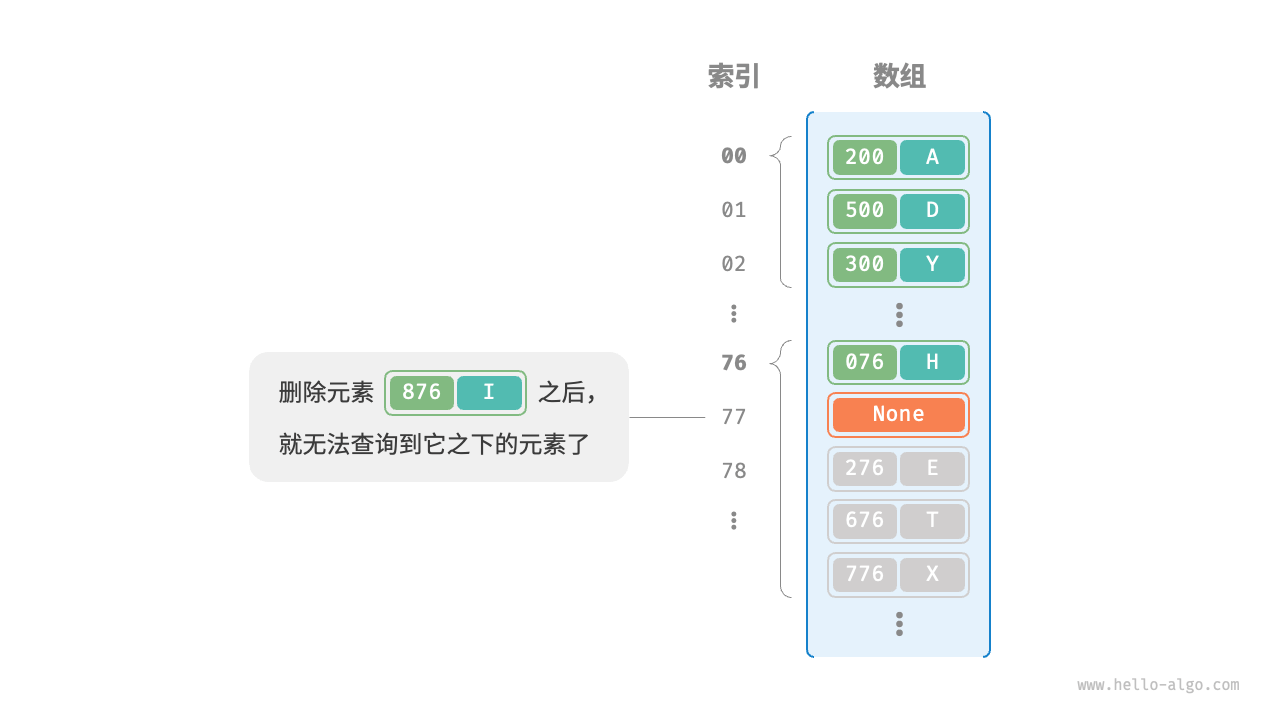

为了解决该问题，我们可以采用<u>懒删除（lazy deletion）</u>机制：它不直接从哈希表中移除元素，**而是利用一个常量 `TOMBSTONE` 来标记这个桶**。在该机制下，`None` 和 `TOMBSTONE` 都代表空桶，都可以放置键值对。但不同的是，线性探测到 `TOMBSTONE` 时应该继续遍历，因为其之下可能还存在键值对。

然而，**懒删除可能会加速哈希表的性能退化**。这是因为每次删除操作都会产生一个删除标记，随着 `TOMBSTONE` 的增加，搜索时间也会增加，因为线性探测可能需要跳过多个 `TOMBSTONE` 才能找到目标元素。

为此，考虑在线性探测中记录遇到的首个 `TOMBSTONE` 的索引，并将搜索到的目标元素与该 `TOMBSTONE` 交换位置。**这一步的目的就是让我们搜索到的目标元素尽可能靠前，减少下一次遍历时在TOMBSTONE上浪费的时间**这样做的好处是当每次查询或添加元素时，元素会被移动至距离理想位置（探测起始点）更近的桶，从而优化查询效率。

以下代码实现了一个包含懒删除的开放寻址（线性探测）哈希表。为了更加充分地使用哈希表的空间，我们将哈希表看作一个“环形数组”，当越过数组尾部时，回到头部继续遍历。


In [ ]:
/* 开放寻址哈希表 */
type hashMapOpenAddressing struct {
    size        int     // 键值对数量
    capacity    int     // 哈希表容量
    loadThres   float64 // 触发扩容的负载因子阈值
    extendRatio int     // 扩容倍数
    buckets     []*pair // 桶数组
    TOMBSTONE   *pair   // 删除标记
}

/* 构造方法 */
func newHashMapOpenAddressing() *hashMapOpenAddressing {
    return &hashMapOpenAddressing{
        size:        0,
        capacity:    4,
        loadThres:   2.0 / 3.0,
        extendRatio: 2,
        buckets:     make([]*pair, 4),
        TOMBSTONE:   &pair{-1, "-1"},
    }
}

/* 哈希函数 */
func (h *hashMapOpenAddressing) hashFunc(key int) int {
    return key % h.capacity // 根据键计算哈希值
}

/* 负载因子 */
func (h *hashMapOpenAddressing) loadFactor() float64 {
    return float64(h.size) / float64(h.capacity) // 计算当前负载因子
}

/* 搜索 key 对应的桶索引 */
func (h *hashMapOpenAddressing) findBucket(key int) int {
    index := h.hashFunc(key) // 获取初始索引
    firstTombstone := -1     // 记录遇到的第一个TOMBSTONE的位置
    for h.buckets[index] != nil {
        if h.buckets[index].key == key {
            if firstTombstone != -1 {
                // 若之前遇到了删除标记，则将键值对移动至该索引处
                h.buckets[firstTombstone] = h.buckets[index]
                h.buckets[index] = h.TOMBSTONE
                return firstTombstone // 返回移动后的桶索引
            }
            return index // 返回找到的索引
        }
        if firstTombstone == -1 && h.buckets[index] == h.TOMBSTONE {
            firstTombstone = index // 记录遇到的首个删除标记的位置
        }
        index = (index + 1) % h.capacity // 线性探测，越过尾部则返回头部
    }
    // 若 key 不存在，则返回添加点的索引
    if firstTombstone != -1 {
        return firstTombstone
    }
    return index
}

/* 查询操作 */
func (h *hashMapOpenAddressing) get(key int) string {
    index := h.findBucket(key) // 搜索 key 对应的桶索引
    if h.buckets[index] != nil && h.buckets[index] != h.TOMBSTONE {
        // h.TOMBSTONE 通常是一个全局唯一的标记，所有被删除
        // 的位置都会指向它，而非多个不同的实例。
        return h.buckets[index].val // 若找到键值对，则返回对应 val
    }
    return "" // 若键值对不存在，则返回 ""
}

/* 添加操作 */
func (h *hashMapOpenAddressing) put(key int, val string) {
    if h.loadFactor() > h.loadThres {
        h.extend() // 当负载因子超过阈值时，执行扩容
    }
    index := h.findBucket(key) // 搜索 key 对应的桶索引，findbucket隐含
    // 了线性探索的逻辑
    if h.buckets[index] == nil || h.buckets[index] == h.TOMBSTONE {
        h.buckets[index] = &pair{key, val} // 若键值对不存在，则添加该键值对
        h.size++
    } else {
        h.buckets[index].val = val // 若找到键值对，则覆盖 val
    }
}

/* 删除操作 */
func (h *hashMapOpenAddressing) remove(key int) {
    index := h.findBucket(key) // 搜索 key 对应的桶索引
    if h.buckets[index] != nil && h.buckets[index] != h.TOMBSTONE {
        h.buckets[index] = h.TOMBSTONE // 若找到键值对，则用删除标记覆盖它
        h.size--
    }
}

/* 扩容哈希表 */
func (h *hashMapOpenAddressing) extend() {
    oldBuckets := h.buckets               // 暂存原哈希表
    h.capacity *= h.extendRatio           // 更新容量
    h.buckets = make([]*pair, h.capacity) // 初始化扩容后的新哈希表
    h.size = 0                            // 重置大小
    // 将键值对从原哈希表搬运至新哈希表
    for _, pair := range oldBuckets {
        if pair != nil && pair != h.TOMBSTONE {
            h.put(pair.key, pair.val)
        }
    }
}

/* 打印哈希表 */
func (h *hashMapOpenAddressing) print() {
    for _, pair := range h.buckets {
        if pair == nil {
            fmt.Println("nil")
        } else if pair == h.TOMBSTONE {
            fmt.Println("TOMBSTONE")
        } else {
            fmt.Printf("%d -> %s\n", pair.key, pair.val)
        }
    }
}

### 平方探测

平方探测与线性探测类似，都是开放寻址的常见策略之一。当发生冲突时，平方探测不是简单地跳过一个固定的步数，而是跳过“探测次数的平方”的步数，即 $1, 4, 9, \dots$ 步。

平方探测主要具有以下优势。

- 平方探测通过跳过探测次数平方的距离，试图缓解线性探测的聚集效应。
- 平方探测会跳过更大的距离来寻找空位置，有助于数据分布得更加均匀。

然而，平方探测并不是完美的。

- 仍然存在聚集现象，即某些位置比其他位置更容易被占用。
- 由于平方的增长，平方探测可能不会探测整个哈希表，这意味着即使哈希表中有空桶，平方探测也可能无法访问到它。

### 多次哈希

顾名思义，多次哈希方法使用多个哈希函数 $f_1(x)$、$f_2(x)$、$f_3(x)$、$\dots$ 进行探测。

- **插入元素**：若哈希函数 $f_1(x)$ 出现冲突，则尝试 $f_2(x)$ ，以此类推，直到找到空位后插入元素。
- **查找元素**：在相同的哈希函数顺序下进行查找，直到找到目标元素时返回；若遇到空位或已尝试所有哈希函数，说明哈希表中不存在该元素，则返回 `None` 。

与线性探测相比，多次哈希方法不易产生聚集，但多个哈希函数会带来额外的计算量。

!!! tip

    请注意，开放寻址（线性探测、平方探测和多次哈希）哈希表都存在“不能直接删除元素”的问题。

## 编程语言的选择

各种编程语言采取了不同的哈希表实现策略，下面举几个例子。

- Python 采用开放寻址。字典 `dict` 使用伪随机数进行探测。
- Java 采用链式地址。自 JDK 1.8 以来，当 `HashMap` 内数组长度达到 64 且链表长度达到 8 时，链表会转换为红黑树以提升查找性能。
- Go 采用链式地址。Go 规定每个桶最多存储 8 个键值对，超出容量则连接一个溢出桶；当溢出桶过多时，会执行一次特殊的等量扩容操作，以确保性能。

# 哈希算法

前两节介绍了哈希表的工作原理和哈希冲突的处理方法。然而无论是开放寻址还是链式地址，**它们只能保证哈希表可以在发生冲突时正常工作，而无法减少哈希冲突的发生**。

如果哈希冲突过于频繁，哈希表的性能则会急剧劣化。如下图所示，对于链式地址哈希表，理想情况下键值对均匀分布在各个桶中，达到最佳查询效率；最差情况下所有键值对都存储到同一个桶中，时间复杂度退化至 $O(n)$ 。

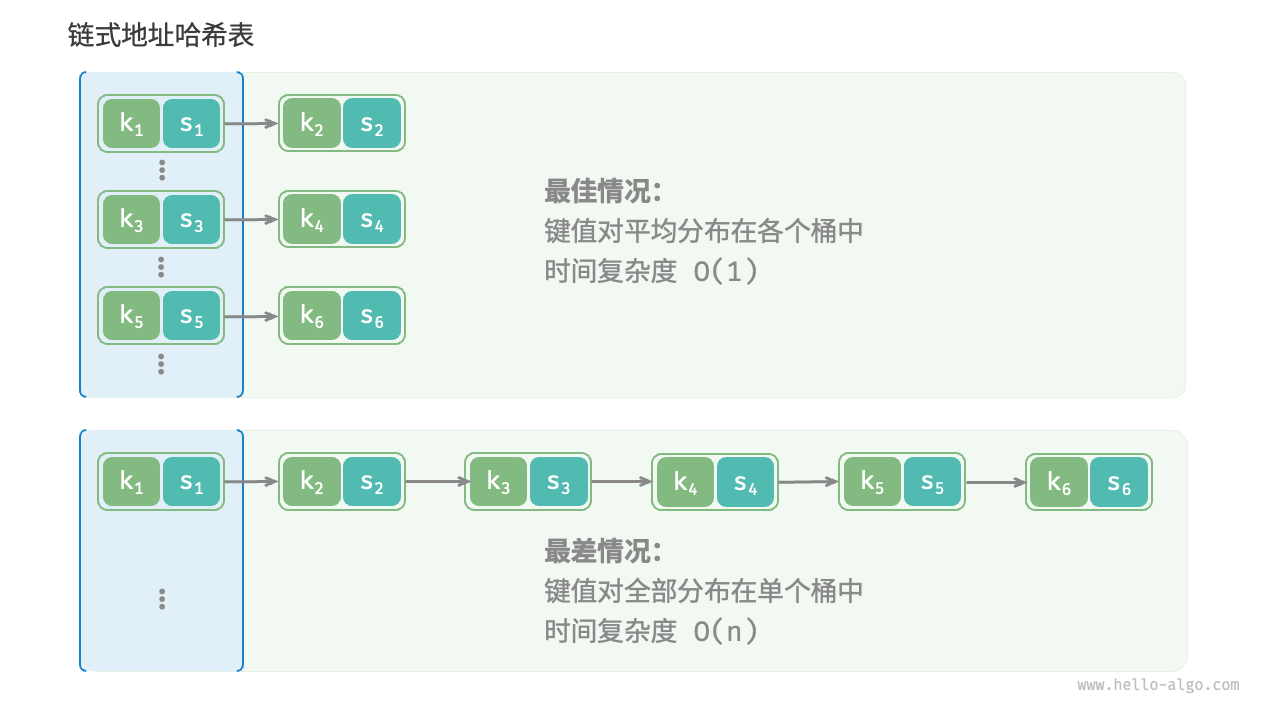

**键值对的分布情况由哈希函数决定**。回忆哈希函数的计算步骤，先计算哈希值，再对数组长度取模：

```shell
index = hash(key) % capacity
```

观察以上公式，当哈希表容量 `capacity` 固定时，**哈希算法 `hash()` 决定了输出值**，进而决定了键值对在哈希表中的分布情况。

这意味着，为了降低哈希冲突的发生概率，我们应当将注意力集中在哈希算法 `hash()` 的设计上。

## 哈希算法的目标

为了实现“既快又稳”的哈希表数据结构，哈希算法应具备以下特点。

- **确定性**：对于相同的输入，哈希算法应始终产生相同的输出。这样才能确保哈希表是可靠的。
- **效率高**：计算哈希值的过程应该足够快。计算开销越小，哈希表的实用性越高。
- **均匀分布**：哈希算法应使得键值对均匀分布在哈希表中。分布越均匀，哈希冲突的概率就越低。

实际上，哈希算法除了可以用于实现哈希表，还广泛应用于其他领域中。

- **密码存储**：为了保护用户密码的安全，系统通常不会直接存储用户的明文密码，而是存储密码的哈希值。当用户输入密码时，系统会对输入的密码计算哈希值，然后与存储的哈希值进行比较。如果两者匹配，那么密码就被视为正确。
- **数据完整性检查**：数据发送方可以计算数据的哈希值并将其一同发送；接收方可以重新计算接收到的数据的哈希值，并与接收到的哈希值进行比较。如果两者匹配，那么数据就被视为完整。

对于密码学的相关应用，为了防止从哈希值推导出原始密码等逆向工程，哈希算法需要具备更高等级的安全特性。

- **单向性**：无法通过哈希值反推出关于输入数据的任何信息。
- **抗碰撞性**：应当极难找到两个不同的输入，使得它们的哈希值相同。
- **雪崩效应**：输入的微小变化应当导致输出的显著且不可预测的变化。

请注意，**“均匀分布”与“抗碰撞性”是两个独立的概念**，满足均匀分布不一定满足抗碰撞性。例如，在随机输入 `key` 下，哈希函数 `key % 100` 可以产生均匀分布的输出。然而该哈希算法过于简单，所有后两位相等的 `key` 的输出都相同，因此我们可以很容易地从哈希值反推出可用的 `key` ，从而破解密码。

## 哈希算法的设计

哈希算法的设计是一个需要考虑许多因素的复杂问题。然而对于某些要求不高的场景，我们也能设计一些简单的哈希算法。

- **加法哈希**：对输入的每个字符的 ASCII 码进行相加，将得到的总和作为哈希值。
- **乘法哈希**：利用乘法的不相关性，每轮乘以一个常数，将各个字符的 ASCII 码累积到哈希值中。
- **异或哈希**：将输入数据的每个元素通过异或操作累积到一个哈希值中。
- **旋转哈希**：将每个字符的 ASCII 码累积到一个哈希值中，每次累积之前都会对哈希值进行旋转操作。


In [ ]:
// 加法哈希
func addHash(key string) int {
	var hash int64
	var modulus int64
	 modulus = 1e9 + 7
	 for _, b := range []byte(key){
		hash = (hash + int64(b)) % modulus
	 }
	 return int(hash)
}

// 乘法哈希
func mulHash(key string) int {
	var hash int64
	var modulus int64
	modulus = 1e9 + 7
	for _, b := range []byte(key){
		hash = (hash*31 + int64(b)) % modulus
	}
	return int(hash)
}

/* 异或哈希 */
func xorHash(key string) int {
    hash := 0
    modulus := 1000000007
    for _, b := range []byte(key) {
        fmt.Println(int(b))
        hash ^= int(b)
        hash = (31*hash + int(b)) % modulus
    }
    return hash & modulus
}

/* 旋转哈希 */
func rotHash(key string) int {
    var hash int64
    var modulus int64

    modulus = 1000000007
    for _, b := range []byte(key) {
        hash = ((hash << 4) ^ (hash >> 28) ^ int64(b)) % modulus
    }
    return int(hash)
}

观察发现，每种哈希算法的最后一步都是对大质数 $1000000007$ 取模，以确保哈希值在合适的范围内。值得思考的是，为什么要强调对质数取模，或者说对合数取模的弊端是什么？这是一个有趣的问题。

先给出结论：**使用大质数作为模数，可以最大化地保证哈希值的均匀分布**。因为质数不与其他数字存在公约数，可以减少因取模操作而产生的周期性模式，从而避免哈希冲突。

举个例子，假设我们选择合数 $9$ 作为模数，它可以被 $3$ 整除，那么所有可以被 $3$ 整除的 `key` 都会被映射到 $0$、$3$、$6$ 这三个哈希值。

$$
\begin{aligned}
\text{modulus} & = 9 \newline
\text{key} & = \{ 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, \dots \} \newline
\text{hash} & = \{ 0, 3, 6, 0, 3, 6, 0, 3, 6, 0, 3, 6,\dots \}
\end{aligned}
$$

如果输入 `key` 恰好满足这种等差数列的数据分布，那么哈希值就会出现聚堆，从而加重哈希冲突。现在，假设将 `modulus` 替换为质数 $13$ ，由于 `key` 和 `modulus` 之间不存在公约数，因此输出的哈希值的均匀性会明显提升。

$$
\begin{aligned}
\text{modulus} & = 13 \newline
\text{key} & = \{ 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, \dots \} \newline
\text{hash} & = \{ 0, 3, 6, 9, 12, 2, 5, 8, 11, 1, 4, 7, \dots \}
\end{aligned}
$$

值得说明的是，如果能够保证 `key` 是随机均匀分布的，那么选择质数或者合数作为模数都可以，它们都能输出均匀分布的哈希值。而当 `key` 的分布存在某种周期性时，对合数取模更容易出现聚集现象。

总而言之，我们通常选取质数作为模数，并且这个质数最好足够大，以尽可能消除周期性模式，提升哈希算法的稳健性。

## 常见哈希算法

不难发现，以上介绍的简单哈希算法都比较“脆弱”，远远没有达到哈希算法的设计目标。例如，由于加法和异或满足交换律，因此加法哈希和异或哈希无法区分内容相同但顺序不同的字符串，这可能会加剧哈希冲突，并引起一些安全问题。

在实际中，我们通常会用一些标准哈希算法，例如 MD5、SHA-1、SHA-2 和 SHA-3 等。它们可以将任意长度的输入数据映射到恒定长度的哈希值。

近一个世纪以来，哈希算法处在不断升级与优化的过程中。一部分研究人员努力提升哈希算法的性能，另一部分研究人员和黑客则致力于寻找哈希算法的安全性问题。下表展示了在实际应用中常见的哈希算法。

- MD5 和 SHA-1 已多次被成功攻击，因此它们被各类安全应用弃用。
- SHA-2 系列中的 SHA-256 是最安全的哈希算法之一，仍未出现成功的攻击案例，因此常用在各类安全应用与协议中。
- SHA-3 相较 SHA-2 的实现开销更低、计算效率更高，但目前使用覆盖度不如 SHA-2 系列。

<p align="center"> 表 <id> &nbsp; 常见的哈希算法 </p>

|          | MD5                            | SHA-1            | SHA-2                        | SHA-3               |
| -------- | ------------------------------ | ---------------- | ---------------------------- | ------------------- |
| 推出时间 | 1992                           | 1995             | 2002                         | 2008                |
| 输出长度 | 128 bit                        | 160 bit          | 256/512 bit                  | 224/256/384/512 bit |
| 哈希冲突 | 较多                           | 较多             | 很少                         | 很少                |
| 安全等级 | 低，已被成功攻击               | 低，已被成功攻击 | 高                           | 高                  |
| 应用     | 已被弃用，仍用于数据完整性检查 | 已被弃用         | 加密货币交易验证、数字签名等 | 可用于替代 SHA-2    |

## 数据结构的哈希值

我们知道，哈希表的 `key` 可以是整数、小数或字符串等数据类型。编程语言通常会为这些数据类型提供内置的哈希算法，用于计算哈希表中的桶索引。以 Python 为例，我们可以调用 `hash()` 函数来计算各种数据类型的哈希值。

- 整数和布尔量的哈希值就是其本身。
- 浮点数和字符串的哈希值计算较为复杂，有兴趣的读者请自行学习。
- 元组的哈希值是对其中每一个元素进行哈希，然后将这些哈希值组合起来，得到单一的哈希值。
- 对象的哈希值基于其内存地址生成。通过重写对象的哈希方法，可实现基于内容生成哈希值。

!!! tip

    请注意，不同编程语言的内置哈希值计算函数的定义和方法不同。

In [ ]:
// Go没有提供内置的hash code函数

在许多编程语言中，**只有不可变对象才可作为哈希表的 `key`** 。假如我们将列表（动态数组）作为 `key` ，当列表的内容发生变化时，它的哈希值也随之改变，我们就无法在哈希表中查询到原先的 `value` 了。

虽然自定义对象（比如链表节点）的成员变量是可变的，但它是可哈希的。**这是因为对象的哈希值通常是基于内存地址生成的**，即使对象的内容发生了变化，但它的内存地址不变，哈希值仍然是不变的。

细心的你可能发现在不同控制台中运行程序时，输出的哈希值是不同的。**这是因为 Python 解释器在每次启动时，都会为字符串哈希函数加入一个随机的盐（salt）值**。这种做法可以有效防止 HashDoS 攻击，提升哈希算法的安全性。

# 小结

### 重点回顾

- 输入 `key` ，哈希表能够在 $O(1)$ 时间内查询到 `value` ，效率非常高。
- 常见的哈希表操作包括查询、添加键值对、删除键值对和遍历哈希表等。
- 哈希函数将 `key` 映射为数组索引，从而访问对应桶并获取 `value` 。
- 两个不同的 `key` 可能在经过哈希函数后得到相同的数组索引，导致查询结果出错，这种现象被称为哈希冲突。
- 哈希表容量越大，哈希冲突的概率就越低。因此可以通过扩容哈希表来缓解哈希冲突。与数组扩容类似，哈希表扩容操作的开销很大。
- 负载因子定义为哈希表中元素数量除以桶数量，反映了哈希冲突的严重程度，常用作触发哈希表扩容的条件。
- 链式地址通过将单个元素转化为链表，将所有冲突元素存储在同一个链表中。然而，链表过长会降低查询效率，可以通过进一步将链表转换为红黑树来提高效率。
- 开放寻址通过多次探测来处理哈希冲突。线性探测使用固定步长，缺点是不能删除元素，且容易产生聚集。多次哈希使用多个哈希函数进行探测，相较线性探测更不易产生聚集，但多个哈希函数增加了计算量。
- 不同编程语言采取了不同的哈希表实现。例如，Java 的 `HashMap` 使用链式地址，而 Python 的 `Dict` 采用开放寻址。
- 在哈希表中，我们希望哈希算法具有确定性、高效率和均匀分布的特点。在密码学中，哈希算法还应该具备抗碰撞性和雪崩效应。
- 哈希算法通常采用大质数作为模数，以最大化地保证哈希值均匀分布，减少哈希冲突。
- 常见的哈希算法包括 MD5、SHA-1、SHA-2 和 SHA-3 等。MD5 常用于校验文件完整性，SHA-2 常用于安全应用与协议。
- 编程语言通常会为数据类型提供内置哈希算法，用于计算哈希表中的桶索引。通常情况下，只有不可变对象是可哈希的。

### Q & A

**Q**：哈希表的时间复杂度在什么情况下是 $O(n)$ ？

当哈希冲突比较严重时，哈希表的时间复杂度会退化至 $O(n)$ 。当哈希函数设计得比较好、容量设置比较合理、冲突比较平均时，时间复杂度是 $O(1)$ 。我们使用编程语言内置的哈希表时，通常认为时间复杂度是 $O(1)$ 。

**Q**：为什么不使用哈希函数 $f(x) = x$ 呢？这样就不会有冲突了。

在 $f(x) = x$ 哈希函数下，每个元素对应唯一的桶索引，这与数组等价。然而，输入空间通常远大于输出空间（数组长度），因此哈希函数的最后一步往往是对数组长度取模。换句话说，哈希表的目标是将一个较大的状态空间映射到一个较小的空间，并提供 $O(1)$ 的查询效率。

**Q**：哈希表底层实现是数组、链表、二叉树，但为什么效率可以比它们更高呢？

首先，哈希表的时间效率变高，但空间效率变低了。哈希表有相当一部分内存未使用。

其次，只是在特定使用场景下时间效率变高了。如果一个功能能够在相同的时间复杂度下使用数组或链表实现，那么通常比哈希表更快。这是因为哈希函数计算需要开销，时间复杂度的常数项更大。

最后，哈希表的时间复杂度可能发生劣化。例如在链式地址中，我们采取在链表或红黑树中执行查找操作，仍然有退化至 $O(n)$ 时间的风险。

**Q**：多次哈希有不能直接删除元素的缺陷吗？标记为已删除的空间还能再次使用吗？

多次哈希是开放寻址的一种，开放寻址法都有不能直接删除元素的缺陷，需要通过标记删除。标记为已删除的空间可以再次使用。当将新元素插入哈希表，并且通过哈希函数找到标记为已删除的位置时，该位置可以被新元素使用。这样做既能保持哈希表的探测序列不变，又能保证哈希表的空间使用率。

**Q**：为什么在线性探测中，查找元素的时候会出现哈希冲突呢？

查找的时候通过哈希函数找到对应的桶和键值对，发现 `key` 不匹配，这就代表有哈希冲突。因此，线性探测法会根据预先设定的步长依次向下查找，直至找到正确的键值对或无法找到跳出为止。

**Q**：为什么哈希表扩容能够缓解哈希冲突？

哈希函数的最后一步往往是对数组长度 $n$ 取模（取余），让输出值落在数组索引范围内；在扩容后，数组长度 $n$ 发生变化，而 `key` 对应的索引也可能发生变化。原先落在同一个桶的多个 `key` ，在扩容后可能会被分配到多个桶中，从而实现哈希冲突的缓解。

**Q**：如果为了高效的存取，那么直接使用数组不就好了吗？

当数据的 `key` 是连续的小范围整数时，直接用数组即可，简单高效。但当 `key` 是其他类型（例如字符串）时，就需要借助哈希函数将 `key` 映射为数组索引，再通过桶数组存储元素，这样的结构就是哈希表。